In [ ]:
# BERT 종류별로 전처리 하는 방법 다름 + 토크나이저 제공해줌
# but BERT 여러 종류 사용해볼것 + 우리 데이터에 맞는 전처리도 필요하니까 일단 하고 BERT로 학습시킬때 제공하는 토크나이저로도 해보기

# https://wikidocs.net/21698
# 토큰화 전후로 정제 및 정규화 해야함

# 토큰화
# - 형태소분석 - 이거말고 딥러닝 쓰는걸로 하는게 나을듯 
#             = sonlp(신조어에 강함), sentencePiece(그냥 조사 끊는게 아니라 단어같은거 추정해서 하니까?)
# - 띄어쓰기 - 띄어쓰기도 실제데이터에 안할거니까 패스..? 아님 한거/안한거 둘다 해보고 비교
# - 맞춤법검사 = 실제 데이터 맞춤법 고쳐서 넣을거 아니니까 패스

# 정제
# - 영어 포함돼있는지 확인 -> 대소문자 통합같은것도 BERT 종류마다 다름
# - 불필요한 단어 제거
#   - 정수 인코딩 -> 등장 빈도가 작은 단어 (from nltk import FreqDist 
#                                   from tensorflow.keras.preprocessing.text import Tokenizer)
#                                   이거 말고도 다른데(BERT)서 제공하는 토크나이저에도 있음
#                                   https://wikidocs.net/99893
#                                   https://velog.io/@taekkim/Hugginface-transformer-%EC%84%A4%EA%B3%84%EA%B5%AC%EC%A1%B0-%EC%82%B4%ED%8E%B4%EB%B3%B4%EA%B8%B0
#              -> 문장 너무 긴거 자르기
#   - 정규 표현식 ( 정규표현식을 통해 한글, 영어, 특수문자를 포함해 Emoji까지 학습 대상에 포함했습니다.
#                 한편, 한글 범위를 ㄱ-ㅎ가-힣 으로 지정해 ㄱ-힣 내의 한자를 제외했습니다.)
#   - 중복 문자열 제거

# 패딩
# - 학습 문장 짦은거 패딩으로 채워서 길이맞추기


# 표제어 추출
# - 어간 추출 (nltk)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/dataset/dataset'


import os
import pandas as pd 
import numpy as np

df = pd.read_csv('dataset_clean.csv')

/content/drive/.shortcut-targets-by-id/19AmDlGex-hSZJyofrcVWB6uu3yQV-PSB/dataset/dataset


In [ ]:
df = df.drop(columns='Unnamed: 0')
df = df.drop(2, axis=0)
df = df.reset_index(drop=True)
df[0:10]

,content,lable
0,ㅋㅋ참신하놐ㅋㅋ,1
1,ㅋㅋㅋ 타이밍,0
2,꿀보툴리움 잼,0
3,ㅎㄷㄷ 충격적이다 진짜공산독재 후진국 중국 정말 극혐!,1
4,공영방송 갓비씨 ㅇㅈ합니다,1
5,ㅋㅋ이ㅓ ㅇㅂ,1
6,ㅇㅂ,0
7,ㅋㅋ빡침보소 ㅋㅋ,0
8,ㅇㅂ가자!,0
9,쟤네 펩시 좋아하는듯,1


In [ ]:
# https://raki-1203.github.io/boostcamp_ai_tech/week_9/03.-single-sentence-classification-based-BERT-train/

# 중복제거 제대로 된건지 확인 + 다른 중복제거 방법 찾기

# https://marketingscribbler.tistory.com/20
# 토큰화 
# - Sentence Tokenization : 문장분리는 먼저하고 나머지는 bert맞춰서 제공해주는걸로?

# - Word Tokenization : bert마다 텍스트 전처리 어떻게 해야하는지 + 그걸 다 제공해주는지 알아보기

# 정제(노이즈 데이터 제거) 및 정규화(표현 방법 다른 단어 통합)
# - Normalization : 어간 추출, 원형 복원
# - 대소문자 통합
# - 노이즈 데이터 제거 : 정규표현식

# 불필요한 토큰 제거 (Stopword)

# 길이 자르고 패딩?

# 정수인코딩
# 원핫인코딩
# Byte Pair Encoding

In [ ]:
# https://velog.io/@jochedda/NLP-%EC%9E%90%EC%97%B0%EC%96%B4-%EC%A0%84%EC%B2%98%EB%A6%AC

# Sentence Tokenization
# - 모든 공백을 없앤 후, 문맥에 따라 띄어쓰기 + 문장을 만드는 것 
# - 맞춤법 검사하고 넣는게 좋을지
#   : 버트 분석해보고 해보자 + 실시간 데이터를 모델에 어떻게 넣을지도 고려해야함

!pip install kss

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.7/77.7 KB 771.2 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 44.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kss: filename=kss-4.5.1-py3-none-any.whl size=53220 sha256=79d4737688fb7f2f9cf7d5363e8dfd3efa7fccbc0813875250e27b1816551db1
  Stored in directory: /root/.cache/pip/wheels/2f/23/d1/e9c8f5f2e8a61bb4cb8e4fdd0d0c951dab78882e3807c7f7ca
  Created wheel for pecab: filename=pecab-1.0.8-py3-none-any.whl size=26646666 sha256=ae27940e63fd1c5a34a13c5f2fcf4f35aa2d842fa4917bccd7d3744bd02e0df8
  Stored in directory: /root/.cache/pip/wheels/5c/91/bf/14eed6eafd0a83f76eab5cf8eb50ddc0b037f059eec2bd2e4a
Successfully built kss pecab


In [ ]:
# 문장 토큰화해서 데이터프레임 재구성

import kss

list = []
nndf = pd.DataFrame(columns=['content', 'label'])

cnt = 0

for i, c in enumerate(df['content'][:223005]):
  if i % 1000 == 0:
    print(i, c)
  list = kss.split_sentences(str(c))
  for j in list:
    nndf.loc[cnt] = [j, df['lable'][i]]
    cnt += 1
  
    

0 ㅋㅋ참신하놐ㅋㅋ
1000 그렇게 dmz 가는 거 만류하다 갑자기 먼저 제안을? 사전 정지 작업 다 해 놓고 또 뭔가 생쑈 하러다 씹쪽 처 먹었네 ㅋㅋㅋ
2000 귀신은 반대로 올리는거란다.
3000 돌아가신 선친의 영혼을 잘못본것 같습니다
4000 ㅇㅂ ㅇㅂ ㅇㅂ ㅇㅂㅇㅂㅇㅂ
5000 엑윽엑윽엑윽엑윽
6000 똑똑한 새끼!
7000 ????????????????
8000 퍼가라고 쓴거
9000 문재앙 개새끼
10000 저게 체포가 가능하다고? 걍 놀이일뿐인것같은데
11000 김진태 이번사건으로 존나 뜨네
12000 1945년 해방이후 대한민국 국토 수호를 한것은 군대도 아니요 소방도 아니며 법원과 검찰은 더더욱 아니다.오직 대한민국 경찰만이 해방후 나라를 지켰을 뿐이다.
13000 민좆당측에서도 참고인 보냈냐?
14000 네다홍저따위 태도로 갔다올거였으면 뽑지도 않았음 결국 앞에선 번지르르하게 말하고 뒤통수친건데 실드질좀작작
15000 좌파는 멍청해서라기보다 정신병자라서 되는거거든유시민 어렸을때 가정환경 존나 불우했을듯
16000 그건 아마도
17000 전라도랍니다
18000 그렇게 정의따지는 새끼가 전두환 정권이 만든 희대의 병신법인 '석사장교'료 군복무 했겠냐?고시야 개인의 자유라지만 병역은 개인사에서 끝까지 쫓아다니는데...하여간 좌파새끼들은 주둥아리질만...
19000 아!!!! 내가1900베다!!!!
20000 일행이잖아 ㅁㅈㅎ
21000 오픈 사전이랑 어학사전을 비교하고 앉잖넼ㅋㅋ왜 엔하위키랑 벡괴사전이랑 장난치세랑 노스모크도 들고 와야지? ㅋㅋ
22000 반도 5천년 통틀어 기적
23000 야! 오늘 티비 다 봤다 !
24000 어마어마하노
25000 oh~
26000 ㄱㅅㅇ?
27000 묵시적청탁이라니 ㅋㅋㅋ
28000 왠지 일본에서 알바하면 여사장하고 섹스 맨날 할수 있을것같음
29000 탈북민 때문이면 탈북민한테만 임의번호 발급해주면 되는거임.
30000 코스코 아니냐
31000 주석에 리용안함 해놨노
32000 없어
33000 엄정화 달

In [ ]:
ndf

,content,label
308872,ㅇㄱㄹㅇㅠ,0
308873,왜 200명을 몰살해 ㅋㅋㅋ,0
308874,모인독고 ㅁㅈㅎ,0
308875,안돼 집사고 융자 40퍼 이하로 내려가면 사라,0
308876,와 중궈 말빨 ㄷㄷㄷ,0
...,...,...
552372,머...제네시스..올라프에디션?,0
552373,항상 여자로 ㅡ ㅡ 저지랄 들이야 남자들 벗겨봐라,1
552374,첫번째 이유가 ㄹㅇ 맞지특히나 뉴스나 기사 몇줄읽은 학생들끼리 대화해도 서로 존나 ...,1
552375,이런식으로 밖에 대화못함기사 뉴스 제대로 읽어본것도 별로없고 그냥 비전문가니 뭐 이...,1


In [ ]:
nndf

,content,label
0,ㅋㅋ참신하놐ㅋㅋ,1
1,ㅋㅋㅋ 타이밍,0
2,꿀보툴리움 잼,0
3,ㅎㄷㄷ 충격적이다,1
4,진짜공산독재 후진국 중국 정말 극혐!,1
...,...,...
308679,강원도는 그래도 미통당이 더많이 이겼는데,0
308680,조회수 400따리면 지역 동수준 맘카페도 아닌데 뭘..,0
308681,족밥이네 꼴랑 1000베 거냐 졸보새끼야2500베 못가면 계정폭파함,0
308682,노다ㅓㅂ,0


In [ ]:
# 문장 토큰화해서 데이터프레임 재구성

import kss

list = []
ndf = pd.DataFrame(columns=['content', 'label'])
print(ndf)

cnt = 308872 

for i, c in enumerate(df['content'][223005:]):
  if i % 1000 == 0:
    print(i, c)
  list = kss.split_sentences(str(c))
  for j in list:
    ndf.loc[cnt] = [j, df['lable'][i+223005]]
    cnt += 1
  

Empty DataFrame
Columns: [content, label]
Index: []
0 ㅇㄱㄹㅇㅠ
1000 그렇게 보였냐그랬나보네
2000 씹대작
3000 홍어파시는분들이냐
4000 꺼져 좀 ㅋㅋㅋ 저 학생도 그래봤자 일베충이 잖아 ㅋㅋ뭘 맨날 좆됬대좆되면 더 잘되고 잘나가더라
5000 좌파 내로남불 역겹네 ㅋㅋ 그거랑 이거랑 같냐면서 또 합리화회로 돌리고있겠지
6000 저.. 저분 채소 코트
7000 일베준애들 다 철컹할듯
8000 빨렙구울들 아침부터 열일하노
9000 변신이 왜 복제능력 감퇴임?
10000 할머니 존경스러워요!!할머니의 말씀 받들어 본받아 훌륭한 사람이 되겠습니다!사랑해요 할머니~~
11000 어멌!! 지려!! ㅋㅋ
12000 얼굴때문에 오히려 공부가 안될거같다.
13000 노짱 대상 몇 년째 연속 수상이냐?
14000 2기가 짜리 써봤는데 2기가는 그냥 인터넷이랑 문서작업할때도 좆같더라..
15000 그거뿐이 안되노쯔위가 이미 뛰어넘었겠네
16000 이종벨 ㅇㅂ
17000 플랜카드는 계획을 써놓은 카드냐?
18000 씨발 이번정부 들어서 첨 듣는 나라 존나많다ㅋㅋ감비아도 그렇고
19000 진짜로 아님? '구라지 씹년아' 아니고?
20000 사무장
21000 5살짜리 여자애를?ㅅㅂ 당장 간다
22000 정신병?
23000 개보지였나
24000 이인제같은새끼
25000 왜 종전선언에 미친놈처럼 구는거냐
26000 무슨 개소리?남녀노소 할거없이 김구라부인 개까이는데어디서 대다수??????
27000 존나 찰지다
28000 첫번째 페북댓글 비꼰거 아니냐?ㅋㅋㅋ
29000 야갤에 누가 퍼갔나봄 ㅋㅋ
30000 미친새끼갘ㅋㅋ
31000 짱깨정도의 나라면 전국의 물탱크차 다끌어외서라도 막을거다 걱정마
32000 드립도 구분못하는 일게이 ㅠㅠ
33000 공산당 국가잖아 공산혁명을 하던지
34000 시발 내 외가가 정읍인데 부끄럽다. 내가 대신 사과한다. 국토부장관 개새끼 시발새끼 뒤져버려라
35000 좆족이나 좌배 클에서 눈팅하는색기들이지
36

In [ ]:
ndf

,content,label
308872,ㅇㄱㄹㅇㅠ,0
308873,왜 200명을 몰살해 ㅋㅋㅋ,0
308874,모인독고 ㅁㅈㅎ,0
308875,안돼 집사고 융자 40퍼 이하로 내려가면 사라,0
308876,와 중궈 말빨 ㄷㄷㄷ,0
...,...,...
552372,머...제네시스..올라프에디션?,0
552373,항상 여자로 ㅡ ㅡ 저지랄 들이야 남자들 벗겨봐라,1
552374,첫번째 이유가 ㄹㅇ 맞지특히나 뉴스나 기사 몇줄읽은 학생들끼리 대화해도 서로 존나 ...,1
552375,이런식으로 밖에 대화못함기사 뉴스 제대로 읽어본것도 별로없고 그냥 비전문가니 뭐 이...,1


In [ ]:
result = pd.concat([ndf, nndf])
result = result.reset_index(drop=True)
result

,content,label
0,ㅇㄱㄹㅇㅠ,0
1,왜 200명을 몰살해 ㅋㅋㅋ,0
2,모인독고 ㅁㅈㅎ,0
3,안돼 집사고 융자 40퍼 이하로 내려가면 사라,0
4,와 중궈 말빨 ㄷㄷㄷ,0
...,...,...
552184,강원도는 그래도 미통당이 더많이 이겼는데,0
552185,조회수 400따리면 지역 동수준 맘카페도 아닌데 뭘..,0
552186,족밥이네 꼴랑 1000베 거냐 졸보새끼야2500베 못가면 계정폭파함,0
552187,노다ㅓㅂ,0


In [ ]:
# 데이터 중복을 제외한 갯수 확인
print(result['content'].nunique())
# print(result.duplicated('content'))
# 중복 데이터 제거
result = result.drop_duplicates(['content'], keep= 'first')

print(result)
# 데이터셋 갯수 확인
# print('중복 제거 후 데이터셋 : {}'.format(len(result)))

512320
                                      content  label
0                                       ㅇㄱㄹㅇㅠ      0
1                             왜 200명을 몰살해 ㅋㅋㅋ      0
2                                    모인독고 ㅁㅈㅎ      0
3                   안돼 집사고 융자 40퍼 이하로 내려가면 사라      0
4                                 와 중궈 말빨 ㄷㄷㄷ      0
...                                       ...    ...
552183                와꾸는 솔직히 1번이 우측 두년 압살이다.      1
552184                 강원도는 그래도 미통당이 더많이 이겼는데      0
552185         조회수 400따리면 지역 동수준 맘카페도 아닌데 뭘..      0
552186  족밥이네 꼴랑 1000베 거냐 졸보새끼야2500베 못가면 계정폭파함      0
552187                                   노다ㅓㅂ      0

[512320 rows x 2 columns]


In [ ]:
import numpy as np

# null 데이터 제거
result['content'].replace('', np.nan, inplace=True)
result = result.dropna(how = 'any')

print('null 제거 후 테스트 데이터셋 : {}'.format(len(result)))

null 제거 후 테스트 데이터셋 : 512320


<ipython-input-50-6c5ba367babd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['content'].replace('', np.nan, inplace=True)


학습 문장 최대 길이 : 1782
학습 문장의 평균 길이 : 22.448895221736414


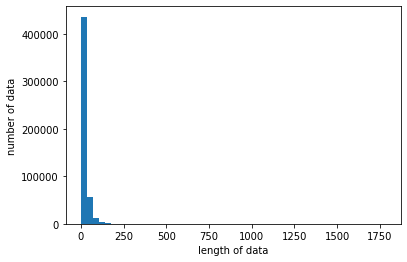

In [ ]:
from matplotlib import pyplot as plt

#학습 리뷰 길이조사
print('학습 문장 최대 길이 :',max(len(l) for l in result['content']))
print('학습 문장의 평균 길이 :',sum(map(len, result['content']))/len(result['content']))

plt.hist([len(s) for s in result['content']], bins=50)
plt.xlabel('length of data')
plt.ylabel('number of data')
plt.show()

In [ ]:
!pip install soynlp
from soynlp.normalizer import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.8/416.8 KB 24.1 MB/s eta 0:00:00


In [ ]:
# https://github.com/jason9693/Soongsil-BERT
# kcBERT가 대소문자 구분함 -> 일단 통일 안함 / 사용하는 BERT 맞춰서 통일하는걸로

!pip install emoji

import re
import emoji
from soynlp.normalizer import repeat_normalize

emojis = ''.join(emoji.UNICODE_EMOJI.keys())
pattern = re.compile(f'[^ .,?!/@$%~％·∼()\x00-\x7Fㄱ-힣{emojis}]+')
url_pattern = re.compile(
    r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)')

def clean(x):
    x = pattern.sub(' ', x)
    x = url_pattern.sub('', x)
    x = x.strip()
    x = repeat_normalize(x, num_repeats=2)
    return x

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
result['content'] = result['content'].apply(clean)

학습 문장 최대 길이 : 1782
학습 문장의 평균 길이 : 22.441509212991882


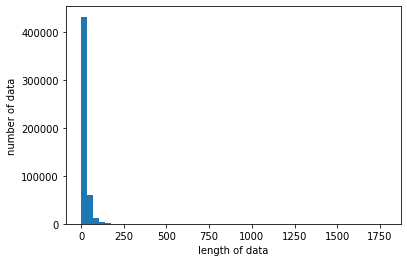

In [ ]:
from matplotlib import pyplot as plt

#학습 리뷰 길이조사
print('학습 문장 최대 길이 :',max(len(l) for l in result['content']))
print('학습 문장의 평균 길이 :',sum(map(len, result['content']))/len(result['content']))

plt.hist([len(s) for s in result['content']], bins=50)
plt.xlabel('length of data')
plt.ylabel('number of data')
plt.show()

In [ ]:
%cd '/content/drive/MyDrive/dataset/dataset'


import os
import pandas as pd 
import numpy as np

check = pd.read_csv('dataset_clean.csv')

/content/drive/.shortcut-targets-by-id/19AmDlGex-hSZJyofrcVWB6uu3yQV-PSB/dataset/dataset


In [ ]:
check

,Unnamed: 0,content,label
0,0,ㅇㄱㄹㅇㅠ,0
1,1,왜 200명을 몰살해 ㅋㅋㅋ,0
2,2,모인독고 ㅁㅈㅎ,0
3,3,안돼 집사고 융자 40퍼 이하로 내려가면 사라,0
4,4,와 중궈 말빨 ㄷㄷㄷ,0
...,...,...,...
512315,552183,와꾸는 솔직히 1번이 우측 두년 압살이다.,1
512316,552184,강원도는 그래도 미통당이 더많이 이겼는데,0
512317,552185,조회수 400따리면 지역 동수준 맘카페도 아닌데 뭘..,0
512318,552186,족밥이네 꼴랑 1000베 거냐 졸보새끼야2500베 못가면 계정폭파함,0


In [ ]:
# # 글자 단위 150이상 제거
cnt = 0
for i, data in enumerate(result['content']):
  
  if len(data) > 150:
    result = result.drop(index=i)

    cnt+=1
print(cnt)
result = result.reset_index(drop=True)

2728


In [ ]:
# 글자 단위 10글자 이하 제거 - 10글자 미만의 텍스트는 단일 단어로 이뤄진 경우가 많아 해당 부분을 제외
# 일단 한글자인 문자만 제거
cnt = 0
for i, data in enumerate(result['content']):
  if len(data) < 2:
    result = result.drop(index=i)
    print(data)
    cnt+=1

result = result.reset_index(drop=True)
print(cnt)
print(result)

안
글
뭐
파
뱉
줌
짜
?
퀴
O
U

넌
핡
돼
또
b
커
난
아
ㅘ
플
솽
조
팅
ㅁ
꼰
캬
참
으

꺅
임
잉

땍
지
털
꽤
튀
갮
찢
매
소
명
워
발
형
네
와
웡
빡
년
걍
딱
곧
자
까
하
静
너
찍

얘
뉨
머
들
노
읍
월
모
탄
교

뭘
턉


쩝
곤
쟨
J
흥

씨
헐
답
쑤
암
프
괌
거

갓
2
횰
췍
끆
시
퉷
.
펑
뇨
썅
o
살
븅
해
생
야
뎼
+
액
ㅈ
4
変
ㅇ

보

풉
슘
1
바
꼭
됨
툽
W


산
된
떡
음
뻥
会
쉑
死
V
点
땅
홀
클
많
굳
컼
햐
한
뜨
싸
펌
마
엉
루
말
둘
저
카
ㄸ
툼
성
웁
왜
셈
v
때
닉
"
슈

3
줘
잼
벽
옹
다
효
댜
캭
탁
좀
7
크
오
쯧
힝
짝
청
빨
뭔
r
퉁
응
n
&
밧

쓴
)
씌
왱
완
퉤
로
I
ㅤ
킄
(

좌
져
꺼
그
흠
꿍
롸
원
할
;
윽
짘
은

엔
슼
석
걷
찐
몰
맊
흑
깅
존
칫
빻
E
옳
니
뱅
益
찹
ㅣ
슴
란
큐
!
궯
쌀
륜
듦
쭛
g
곰
ㅙ
휴
숩
묵
이
넼
겐
기
핰

금

부
웬
꿰
갖
스
룩
속
뜸
만
찾
됐
섯
베
꾸
출
핑
감
F
후
롯
령

핥
焼
찎
럭
꽇
私
_
얍
흐
전
뭐
*
엥
쫌
에
0
함
앗
탑
ㅎ
밴
ㅄ
어
ㅗ
우
ㅌ
엠
상
슨
엿
혐


무
쏠
좋
쟝
승
ㄹ
뿡

ㅋ

씹
ㅛ
힛
닌
뮤
끗
뷰
끄

올
유
凸
광
ㅠ
ㄵ
틀
ㅅ
ㄷ
앙
퇫
골
굿
맨
블
흼
댓
즐
드
철
f
짠
d
쉿
도
헉
론
코
똥
뚝
ㄱ
z
동
}
폭
메
닭
ㅂ
냠
~
엌
따
님
끝
꼐
콜
쉔
벤
넴
6
센
허
챸
웅
5
국
순
게
신
박
ㅀ
병

폐
ㄳ
넵
개
군
현
끙
냥

꺄
멍
검
A
앜
건
장
척
킼
얌
乃
섹

수
싫
끽
케
홓
새
-
h
림
리
막
레
빵
ㅡ
홍
는
피
잘
ㄴ
쩜
北
섻
탕
놈

알
읿
힠
물
버
훗
쨘
위
주
녜
됌
라
B
!
헬
ㅉ
옙
세
땡
헿
용
롤
ㅊ
놔
정

넘
짭
관
'
>
뷁
러
끼
간
찡
쥐
염
앙

실
헫
컄
訴
재
X
사
멀
D
ㆍ
팁
숭

뒤

각
비
긔

a
예
냐
슝
쑻
쟤
·
쿤
랄


In [ ]:
result.to_csv('dataset_clean.csv', header='False', index='False')